# 1. Decision tree

## 1.1. Getting data

In [2]:
from sklearn.datasets import load_iris
from collections import Counter

data, target = load_iris(return_X_y = True, as_frame = True)
print(data.info())
print(Counter(target))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
Counter({0: 50, 1: 50, 2: 50})


## 1.2. Tree learning

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0 )
cross_val_score(clf, data, target, cv=10)


In [3]:
clf.fit(data,target)

DecisionTreeClassifier(random_state=0)

In [4]:
clf.get_depth()

5

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
depth_uptimize = clf.get_depth()

In [7]:
parameters = { 'max_depth':range(2, depth_uptimize + 1  )}

In [8]:
parameters

{'max_depth': range(2, 6)}

In [9]:
clf_GridSearchCV = GridSearchCV(clf, parameters)

In [10]:
clf_GridSearchCV

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(2, 6)})

In [11]:
clf_GridSearchCV.fit(data,target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(2, 6)})

In [12]:
clf_GridSearchCV.best_params_

{'max_depth': 4}

## 1.3. Visualizing the tree

In [13]:
clf_GridSearchCV.best_estimator_

DecisionTreeClassifier(max_depth=4, random_state=0)

In [14]:
from sklearn import tree

[Text(0.5, 0.9, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.7, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.3, 'petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.3, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.8461538461538461, 0.5, 'petal length (cm) <= 4.85\ngini = 0.043\n

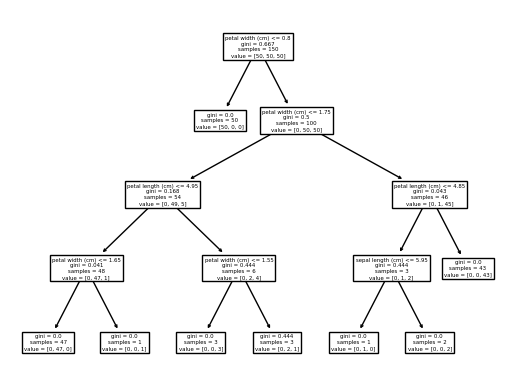

In [16]:

tree.plot_tree(clf_GridSearchCV.best_estimator_,feature_names = data.columns )


In [17]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

# 2. Datalog

## 2.1. Creating terms

## 2.2. Query

## 2.3. Conjunction

## 2.4. Functions

## 2.5. Conditions

# 3. Describing the Tree with Datalog

## 3.1. Creating terms

## 3.2. Rules

## 3.2. Facts

## 3.3. Query

# 4. Dynamic clauses generation